# Modelling

- Initial example on some simple modelling using supervised `UMAP` and `sklearn`'s `GroupShuffleSplit` function.
- `df_X` and `df_y` are assumed processed. `df_y` should contain the binary label `Died`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

import sys; sys.path.append('../../src')
from config import DATA

In [3]:
df_X = pd.read_csv(DATA/'processed/X_numerical.csv').set_index(['pin', 'date_daily'])
df_y = pd.read_csv(DATA/'processed/y_deaths.csv').set_index(['pin', 'date_daily'])

---

### Supervised UMAP

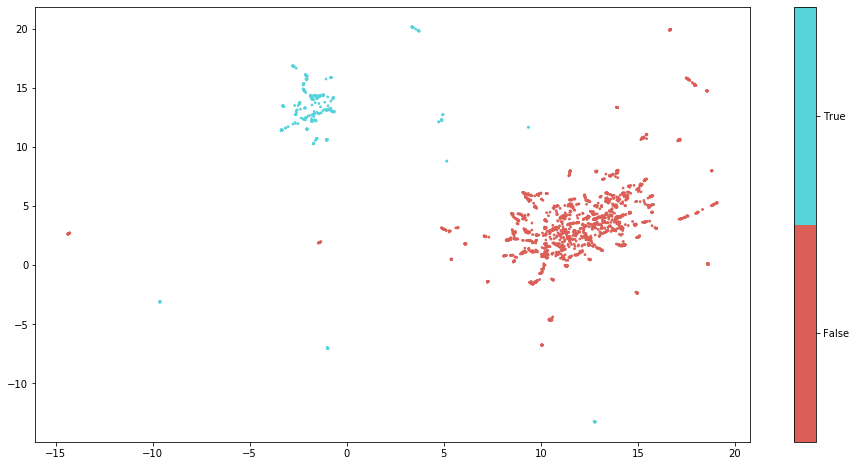

In [4]:
import matplotlib.pyplot as plt
from utils.manifold import supervised_umap
supervised_umap(df_X, df_y, label='Died', labels_dict={'False':0, 'True':1})

---

### Using grouped shuffle split cross validation

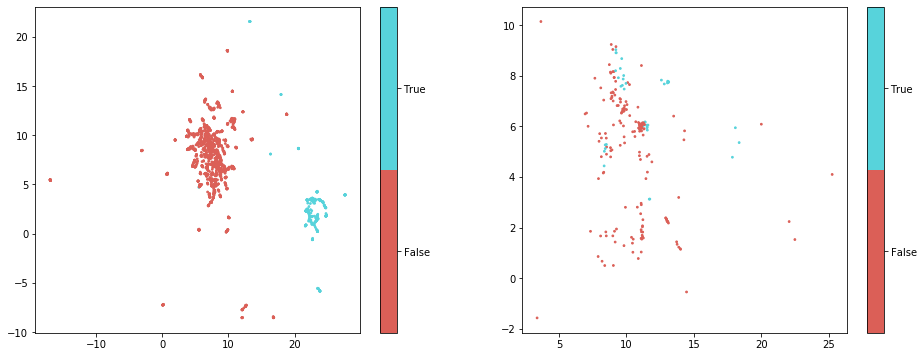

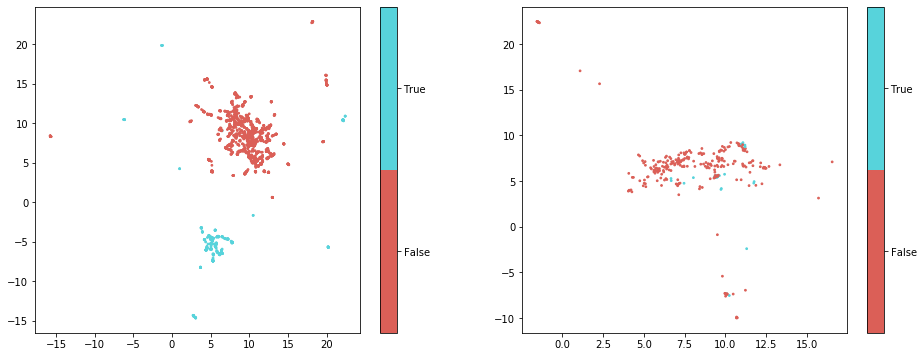

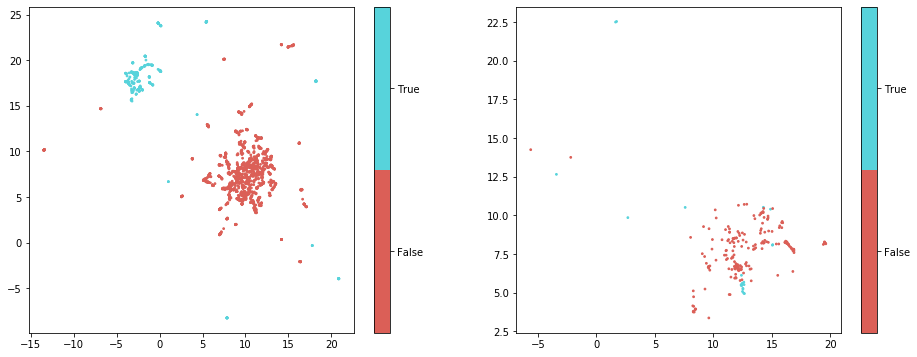

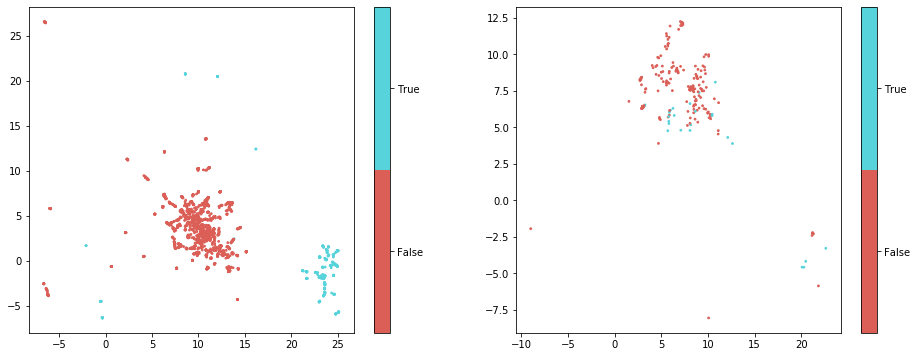

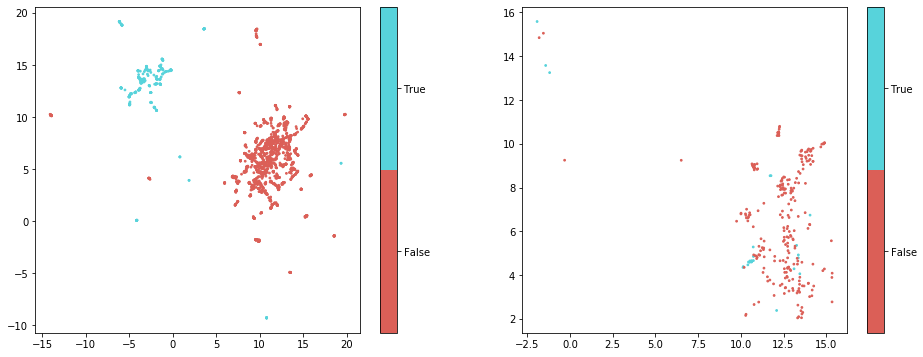

In [5]:
from utils.manifold import umap_embed, plot_umap_transform
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=5, train_size=.9, random_state=42)

for train_idx, test_idx in gss.split(df_X, df_y, df_X.reset_index()['pin']):
    X_train, y_train, X_test, y_test = df_X.iloc[train_idx], df_y.iloc[train_idx], df_X.iloc[test_idx], df_y.iloc[test_idx]
    X_train_umap,X_test_umap = umap_embed(X_train,y_train,X_test)
    plot_umap_transform(X_train_umap,X_test_umap,y_train,y_test,labels_dict={'False':0, 'True':1})

---

## Other supervised modelling
1. Logistic Regression
2. kNN
3. Random Forest
4. SVM

---
---